1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

            features_1  features_2  features_3
features_1     1.00000    -0.00522     0.02369
features_2    -0.00522     1.00000     0.04736
features_3     0.02369     0.04736     1.00000


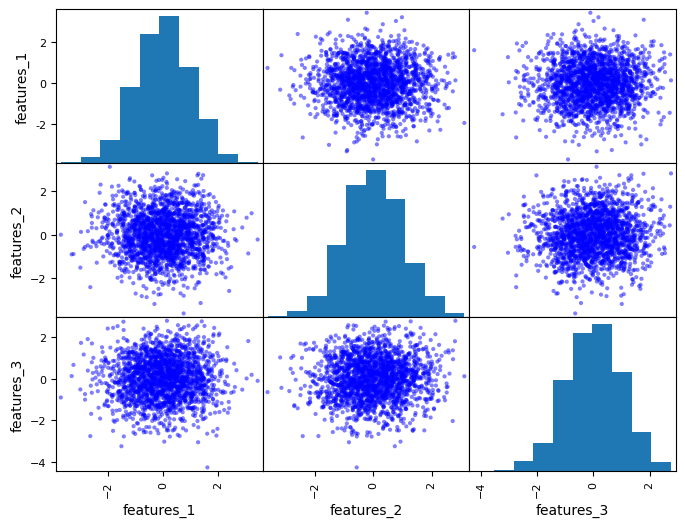

In [2]:
#!wget "https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv" -P ./data/
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/regression_generated.csv")
scatter_plots = pd.plotting.scatter_matrix(data[['features_1','features_2', 'features_3']],figsize=(8,6), c="b", grid='True')

correlations = data[['features_1','features_2', 'features_3']].corr()
print(correlations)

# As it is shown in correlation matrix, these features are NOT correlated.

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [ ]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

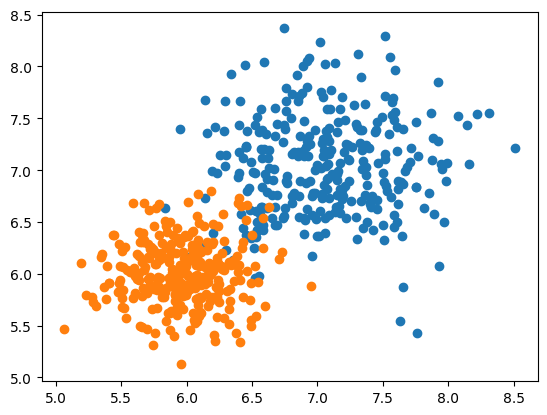

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_dist(m,s,N) : 
    x = np.random.normal(m, s, N)
    y = np.random.normal(m, s, N)
    return x,y

N = 300
m1 = 7
s1 = 0.5
x1, y1 = gaussian_dist(m1, s1, N)
plt.scatter(x1,y1)

m1 = 6
s1 = 0.3
x1, y1 = gaussian_dist(m1, s1, N)
plt.scatter(x1,y1)

plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

           residuals  distances
residuals   1.000000   0.043404
distances   0.043404   1.000000


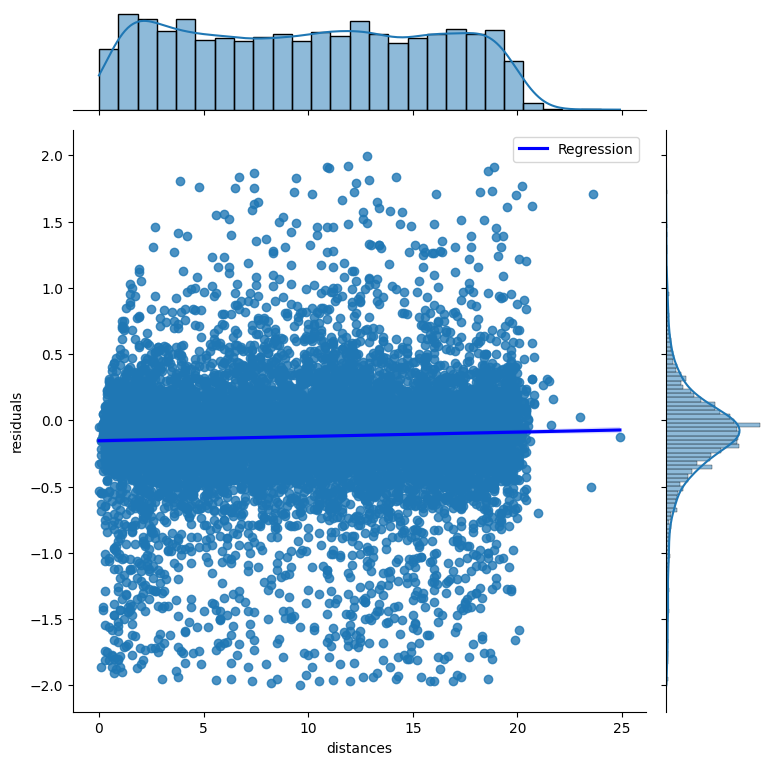

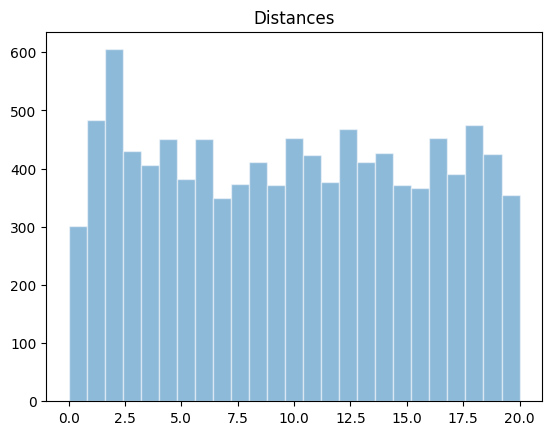

x:
[ 0.4  1.2  2.   2.8  3.6  4.4  5.2  6.   6.8  7.6  8.4  9.2 10.  10.8
 11.6 12.4 13.2 14.  14.8 15.6 16.4 17.2 18.  18.8 19.6]

y:
[-0.23334013605442772, -0.15755664004732142, -0.17261881149154032, -0.17265891472867756, -0.1411489841986534, -0.1253149206349072, -0.13273011717775512, -0.14486896842993777, -0.09200968754262727, -0.06308125923400477, -0.10698127600554033, -0.07129621095749959, -0.0826782297908158, -0.06445007317348095, -0.09530335934848333, -0.0836770451770448, -0.10805016799907265, -0.160195282807955, -0.16657834101381522, -0.10807084526461247, -0.12948735777497009, -0.18194154183413255, -0.12654025062656765, -0.11727137254902373, -0.03681678773205391]

err_y:
[0.4700588141456735, 0.4556535903066799, 0.4169192860411486, 0.42788007790199317, 0.41456157917050324, 0.3690118869515621, 0.37173679034485, 0.4674984551138312, 0.43991848237494285, 0.4384711211211886, 0.43880848874263295, 0.41794274117981045, 0.43093073405161025, 0.4569439831599645, 0.47166644112030204, 0.4845

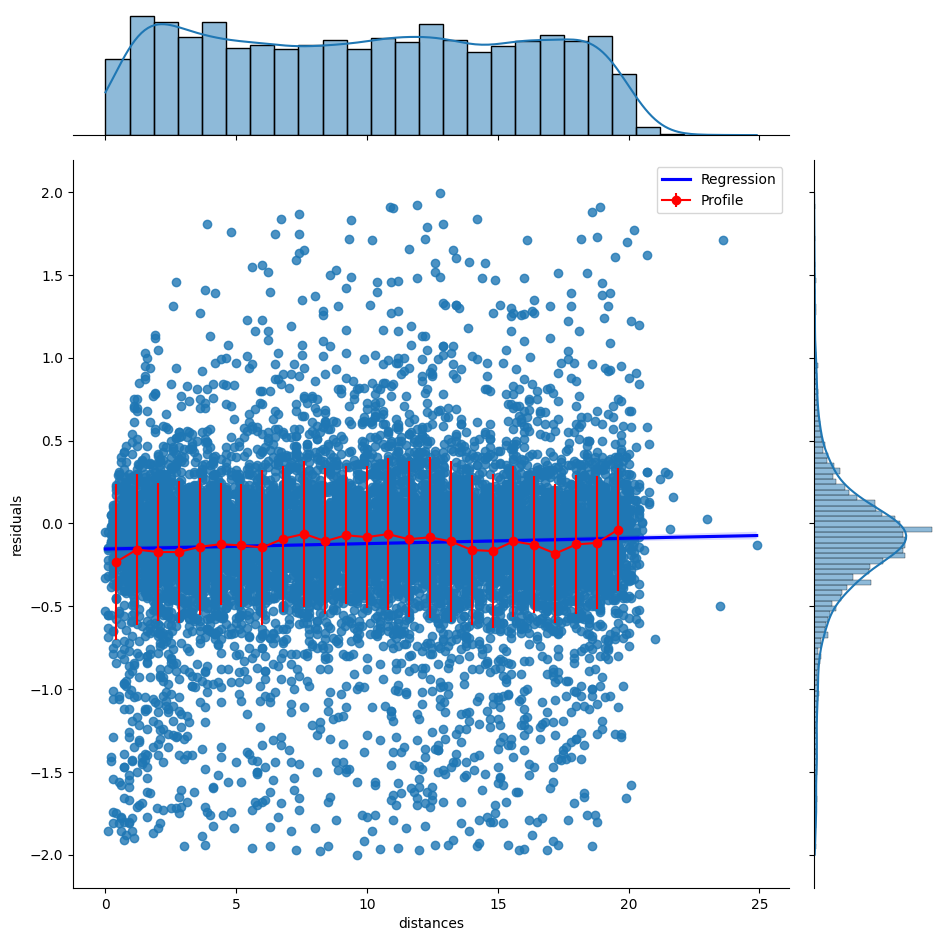

In [25]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P ./data/ 
import seaborn as sb
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = np.load('data/residuals_261.pkl', allow_pickle=True).item()
dataset = pd.DataFrame(dataset) 
dataset = dataset[abs(dataset['residuals'])<2]

corr = dataset[['residuals','distances']].corr()
print(corr)
# residuals and distances are not correlated!

plot1 = sb.jointplot(x='distances', y='residuals', data=dataset, kind="reg", joint_kws={'line_kws':{'color':'b', 'label':'Regression'}})
plot1.ax_joint.legend()
plot1.fig.set_size_inches(8,8)
plt.show()

bin = 25
(n, bins, patches) = plt.hist(dataset['distances'], bins=bin, alpha=0.5, edgecolor='white', range=(0,20))
plt.title("Distances")
plt.show()


x=(bins[1:]+bins[:-1])*0.5
print(f"x:\n{x}")

y = [dataset["residuals"][(dataset['distances'] >=bins[i]) & (dataset['distances'] <=bins[i+1])].mean() for i in range(bin)]
print(f"\ny:\n{y}")

err_y = [dataset["residuals"][(dataset['distances'] >bins[i]) & (dataset['distances'] <bins[i+1])].std() for i in range(bin)]
print(f"\nerr_y:\n{err_y}")


plot2 = sb.jointplot(x='distances', y='residuals', data=dataset, kind="reg", joint_kws={'line_kws':{'color':'b', 'label':'Regression'}}) #scatter
plot2.fig.set_size_inches(10,10)
plt.sca(plot2.ax_joint)
plt.errorbar(x=x, y=y , yerr=err_y, marker = 'o', color = 'r', xlolims=22, label="Profile") #profile
plt.legend()
plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


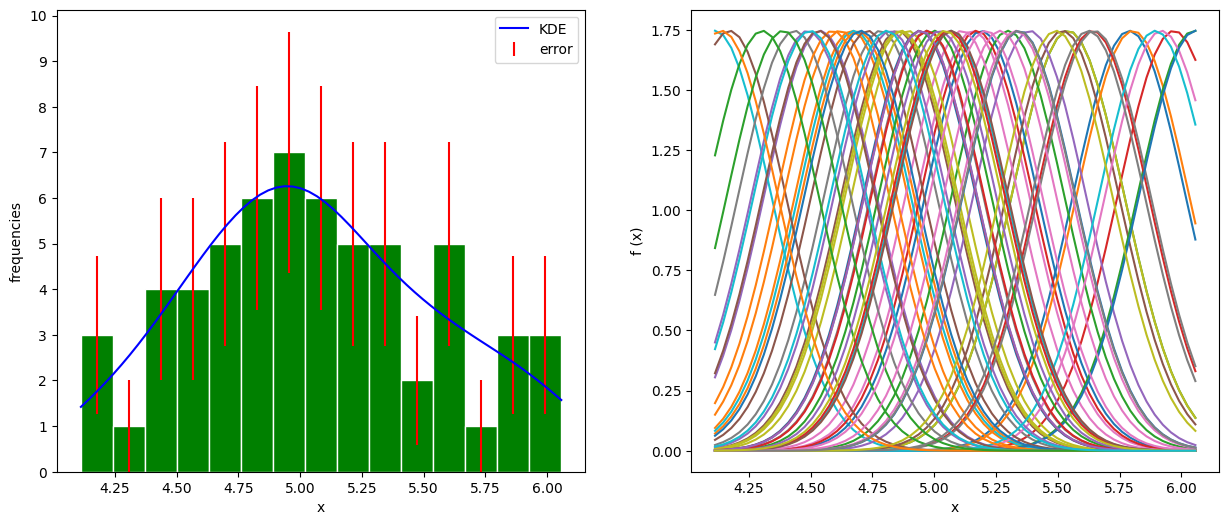

In [20]:
from scipy import stats
import scipy
from matplotlib.ticker import AutoMinorLocator

N = 60
m = 5
s = 0.5
no_bins = 15

x = m + s * np.random.randn(N)

fig, (plot1, plot2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6)) 

bins = plot1.hist(x, bins=no_bins, color='g',edgecolor='white')

plot1.set_yticks(np.arange(0, N, 1)) 
error = np.sqrt(bins[0])
bins_center = (bins[1][:-1] + bins[1][1:])*0.5
plot1.errorbar(bins_center, bins[0], yerr=error, fmt='none', color='r', label="error")

std_def = 1.06*x.std() * x.size**(-1/5)
gaussians=[]
space = np.linspace(np.min(x), np.max(x), N)
for item in x:
    nrm = stats.norm(item, std_def)
    gaussians.append(nrm.pdf(space))
    plot2.plot(space, gaussians[-1])
    

area_sog = scipy.integrate.trapz(np.sum(gaussians, axis=0), space)
area_hist = sum(np.diff(bins[1])*bins[0])
k_norm = area_sog/area_hist
norm_sog = np.sum(gaussians, axis=0)/k_norm

plot1.plot(space, norm_sog, color="b", label="KDE")
plot1.legend()
plot1.set_xlabel('x')
plot1.set_ylabel('frequencies')
plot2.set_xlabel('x')
plot2.set_ylabel('f (x)')
plt.show()